In [ ]:
Ultra PRO задание. Вариант 2

Возьмите любую базу картинок (Mnist, Fashion Mnist, Cifar10 или собственную)
На картинках в случайных местах сделайте квадраты разного размера. Варианты
размера квадратов - на ваш выбор

Обучите автокодировщик восстанавливать контент картинок, который скрыт
квадратами
*работать может не идеально
**это не совсем автокодировщик, так как у автокодировщика вход строго равен выходу, но
архитектура очень близкая к автокодировщику

In [23]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, UpSampling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist, fashion_mnist

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os
from google.colab import drive
import time

In [3]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()

xTrainMnist = xTrainMnist.astype('float32')/255

xTrainMnist = xTrainMnist.reshape(-1, 28, 28, 1)

xTrainMnist.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

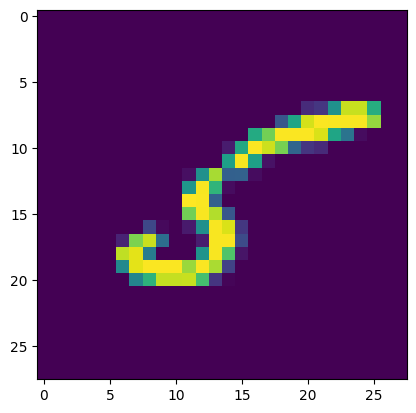

In [4]:
plt.imshow(xTrainMnist[11])

In [10]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()
xTrainMnist_new = xTrainMnist.copy()
for i in range(len(xTrainMnist_new)):
  x_size, y_size = 8, 8
  x_rnd, y_rnd = random.randint(0, 28-x_size), random.randint(0, 28-y_size)
  for x in range(x_rnd, x_rnd + x_size):
    for y in range(y_rnd, y_rnd + y_size):
        xTrainMnist_new[i][x][y] = 128 # вариант [x, y] = 128 тоже работает
print(len(xTrainMnist_new))

60000


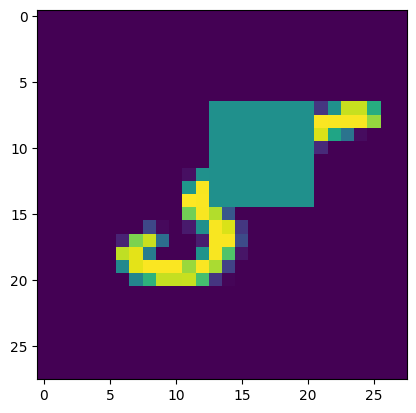

In [16]:
plt.imshow(xTrainMnist_new[11])

In [11]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()
xTestMnist_new = xTestMnist.copy()
for i in range(len(xTestMnist_new)):
  x_size, y_size = 8, 8
  x_rnd, y_rnd = random.randint(0, 28-x_size), random.randint(0, 28-y_size)
  for x in range(x_rnd, x_rnd + x_size):
    for y in range(y_rnd, y_rnd + y_size):
        xTestMnist_new[i][x][y] = 128 # вариант [x, y] = 128 тоже работает
print(len(xTestMnist_new))

10000


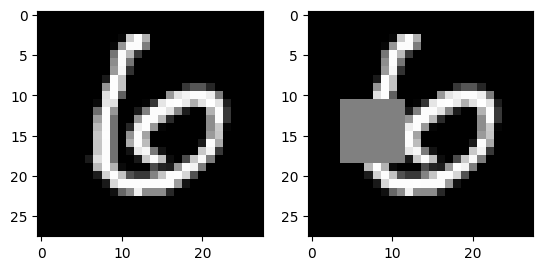

In [19]:
plt.subplot(1,2,1)
plt.imshow(xTestMnist[11], cmap='gray', interpolation='none');
plt.subplot(1,2,2)
plt.imshow(xTestMnist_new[11], cmap='gray', interpolation='none');

In [ ]:
#Автокодировщик

In [20]:
def baseAutoencoder(shape=(28,28,1)):
    img_input = Input((shape))

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input)
    x = BatchNormalization()(x) # затем пропускаем через слой нормализации данных
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # далее снова слой двумерной свёртки
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x) # передаём на слой подвыборки, снижающий размерность поступивших на него данных

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    z = MaxPooling2D()(x)

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z) # слой разжимает данные(с 28*20 на 56*40)
    x = BatchNormalization()(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)


    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) # слой разжимает данные(с 56*40 на 112*80)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)


    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(lr=0.0001),
             loss='mean_squared_error')

    return model

In [21]:
modelAutoMnist = baseAutoencoder((28,28,1))
modelAutoMnist.fit(xTrainMnist_new[:2000], xTrainMnist[:2000], epochs=512, batch_size=128, validation_data = (xTestMnist_new[-500:], xTestMnist[-500:]))


modelAutoMnist.save_weights('modelAutoMnist.h5')
modelAutoMnist.load_weights('modelAutoMnist.h5')
modelAutoMnist.summary()

Epoch 1/512
16/16 [==============================] - 31s 2s/step - loss: 7196.5737 - val_loss: 6968.6299
Epoch 2/512
16/16 [==============================] - 26s 2s/step - loss: 7192.3979 - val_loss: 6968.5068
Epoch 3/512
16/16 [==============================] - 27s 2s/step - loss: 7192.3721 - val_loss: 6968.6602
Epoch 4/512
16/16 [==============================] - 30s 2s/step - loss: 7192.3608 - val_loss: 6969.6709
Epoch 5/512
16/16 [==============================] - 28s 2s/step - loss: 7192.3525 - val_loss: 6971.2979
Epoch 6/512
16/16 [==============================] - 29s 2s/step - loss: 7192.3462 - val_loss: 6972.9365
Epoch 7/512
16/16 [==============================] - 24s 2s/step - loss: 7192.3389 - val_loss: 6973.5518
Epoch 8/512
16/16 [==============================] - 27s 2s/step - loss: 7192.3330 - val_loss: 6973.6172
Epoch 9/512
16/16 [==============================] - 27s 2s/step - loss: 7192.3271 - val_loss: 6972.8711
Epoch 10/512
16/16 [==============================] - 2

In [24]:
predMnist = modelAutoMnist.predict(xTestMnist_new[:1200]) # просим модель вернуть нам изображение по первым 12тыс.

predMnist = predMnist * 255 # представляем в виде значений от 0 до 255
predMnist = predMnist.astype('uint8') # устанавливаем 8битовый тип


38/38 [==============================] - 4s 93ms/step


In [47]:
def plotImages(xTestMnist_new, pred, shape=(28,28)):

  n = 1  # количество картинок, которые хотим показать
  plt.figure(figsize=(10, 4)) # указываем размеры фигуры

  for i in range(n): # для каждой картинки из n
    index = np.random.randint(0, pred.shape[0]) # startIndex - начиная с какого индекса хотим заплотить картинки
    ax = plt.subplot(2, n, i + 1) # выведем область рисования Axes
    plt.imshow(xTestMnist_new[index].reshape(shape))
    plt.gray() # выведем в черно-белом цвете
    ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
    ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y
    ax = plt.subplot(2, n, i + 1 + n) # выведем область рисования Axes
    plt.imshow(pred[index].reshape(shape)) # отрисуем обработанные сеткой картинки в размере 112*80
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

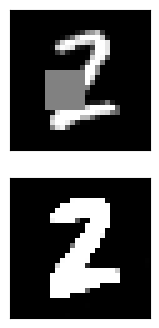

In [58]:
plotImages(xTestMnist_new, predMnist, shape=(28,28)) # покажем исходные и восстановленные картинки
